In [1]:
import os
# Set environment variable to suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from src.loading_data.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, load_cv_data, make_importance_sampling_dataset
from src.cnn_emos.nn_forecast import CNNEMOS
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf, comp_multiple_pit_scores
from src.visualization.reliability_diagram import make_reliability_and_sharpness_tf
from src.visualization.plot_forecasts import plot_forecast_pdf_tf, plot_weight_mixture_cnns
from src.climatology.climatology import Climatology
from src.linreg_emos.emos import BootstrapEmos, LinearEMOS
from src.loading_data.get_data import get_fold_is
from src.visualization.brier_score import make_bootstrap_brier, make_bootstrap_brier_efficient


import sklearn

from scipy.stats import norm, pareto

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import optuna

In [2]:
all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in all_features}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

In [3]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/climatology/climatology_cv_0'

climatology = Climatology.load(folder)

In [4]:
train_data0, test_data0_original, ignore = load_cv_data(0, features_names_dict)

data_load = train_data0.batch(32)

train_data0 = train_data0.batch(train_data0.cardinality())
test_data0 = test_data0_original.batch(test_data0_original.cardinality())

In [5]:
train_data1, test_data1_original, ignore = load_cv_data(1, features_names_dict)

train_data1 = train_data1.batch(train_data1.cardinality())
test_data1 = test_data1_original.batch(test_data1_original.cardinality())

In [6]:
train_data2, test_data2_original, ignore = load_cv_data(2, features_names_dict)

train_data2 = train_data2.batch(train_data2.cardinality())
test_data2 = test_data2_original.batch(test_data2_original.cardinality())

In [7]:
train_data3, test_data3_original, ignore = load_cv_data(3, features_names_dict)

train_data3 = train_data3.batch(train_data3.cardinality())
test_data3 = test_data3_original.batch(test_data3_original.cardinality())

In [8]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base'

with open(filepath, 'rb') as f:
    emos_base = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme'

with open(filepath, 'rb') as f:
    extreme = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate'

with open(filepath, 'rb') as f:
    intermdiate = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [9]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base1'

with open(filepath, 'rb') as f:
    emos_base1 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme1'

with open(filepath, 'rb') as f:
    extreme1 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate1'

with open(filepath, 'rb') as f:
    intermdiate1 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [10]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base2'

with open(filepath, 'rb') as f:
    emos_base2 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme2'

with open(filepath, 'rb') as f:
    extreme2 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate2'

with open(filepath, 'rb') as f:
    intermdiate2 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [11]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base3'

with open(filepath, 'rb') as f:
    emos_base3 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme3'

with open(filepath, 'rb') as f:
    extreme3 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate3'

with open(filepath, 'rb') as f:
    intermdiate3 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [12]:
linear_weight_models = {'Extreme': extreme, 'Intermediate': intermdiate}

all_linear_models = {'Extreme': extreme, 'Intermediate': intermdiate, 'Vanilla': emos_base}

In [13]:
linear_weight_models1 = {'Extreme': extreme1, 'Intermediate': intermdiate1}

all_linear_models1 = {'Extreme': extreme1, 'Intermediate': intermdiate1,'Vanilla': emos_base1, }

In [14]:
linear_weight_models2 = {'Extreme': extreme2, 'Intermediate': intermdiate2}

all_linear_models2 = {'Extreme': extreme2, 'Intermediate': intermdiate2, 'Vanilla': emos_base2, }

In [15]:
linear_weight_models3 = {'Extreme': extreme3, 'Intermediate': intermdiate3}

all_linear_models3 = {'Extreme': extreme3, 'Intermediate': intermdiate3, 'Vanilla': emos_base3, }

In [51]:
x = np.linspace(0, 20, 2000)
y_intermediate = norm.cdf(x, loc=7.050563812255859, scale=2.405172109603882) + 0.06170300021767616

y_extreme = norm.cdf(x, loc=8.830960273742676, scale=1.0684260129928589) + 0.015800999477505684

x_base = np.ones(x.shape)

In [17]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

with open(filepath + 'epochs_115_twcrps_m9_std1_c_015.pickle', 'rb') as f:
    epochs_extreme = np.array(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

with open(filepath + 'epochs_115_crps.pickle', 'rb') as f:
    epochs_115 = np.array(pickle.load(f))

In [54]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/crps_tn_115'

cnn_base = CNNEMOS.my_load(filepath, data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/extreme_tn-ln_115'

cnn_extreme = CNNEMOS.my_load(filepath, data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/model_87'

model87 = CNNEMOS.my_load(filepath, data_load)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 114 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 126 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


In [55]:
cnn_models = {'TN CRPS': cnn_base, 'TN-LN Extreme': cnn_extreme, 'Model87': model87}

In [43]:
filepath = '/net/pc200239/nobackup/users/hakvoort/hyperopt/hyperopt_cnn/'

study_small = optuna.load_study(study_name='hyperoptCNN_small_space_444', storage=f'sqlite:///{filepath}/study.db')
study_small.set_metric_names(['CRPS', 'twCRPS12'])

/tmp/ipykernel_1493959/856509195.py:4: ExperimentalWarning: set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.
  study_small.set_metric_names(['CRPS', 'twCRPS12'])


In [44]:
df_small = study_small.trials_dataframe()

new_columns_names = {
    'values_CRPS': 'CRPS',
    'values_twCRPS12': 'twCRPS12',
    'params_Batch Size': 'Batch Size',
    'params_Forecast Distribution': 'Forecast Distribution',
    'params_L2 Regularization': 'L2 Regularization',
    'params_Learning Rate': 'Learning Rate',
    'params_Number of Layers': 'Number of Layers',
    'params_Number of Units per Layer': 'Number of Units per Layer',
    'params_Optimizer': 'Optimizer',
    'params_cf constant': 'cf constant',
    'params_cf mean': 'cf mean',
    'params_cf std': 'cf std',
    'user_attrs_Average Epochs': 'Average Epochs'
}

df_small.rename(columns=new_columns_names, inplace=True)

In [45]:
length = 12
top_CRPS_small = df_small.sort_values('CRPS').head(length)
top_twCRPS12_small = df_small.sort_values('twCRPS12').head(length)

pareto_front_small = study_small.best_trials
best_runs_small = [trial.number for trial in pareto_front_small]

pareto_trials_small = df_small['number'].isin(best_runs_small)

my_run_small = df_small[pareto_trials_small]

my_run_small = my_run_small.sort_values('CRPS')

params2 = [
    'Average Epochs',
'cf mean',
'cf std',
'cf constant',
 'CRPS',
'twCRPS12',
]

## Results Linear Models

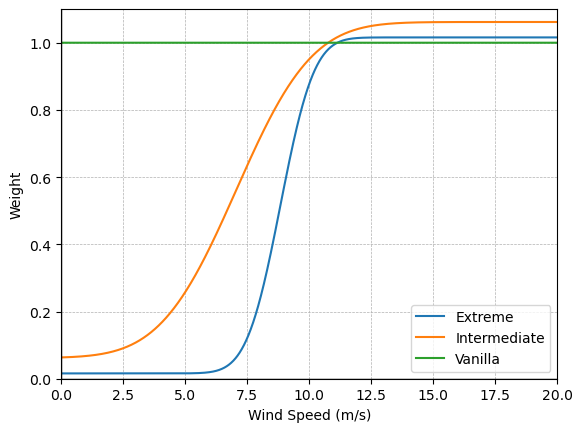

In [53]:
plt.plot(x, y_extreme, label='Extreme')
plt.plot(x, y_intermediate, label='Intermediate')
plt.plot(x, x_base, label='Vanilla')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Weight')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(0,20)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

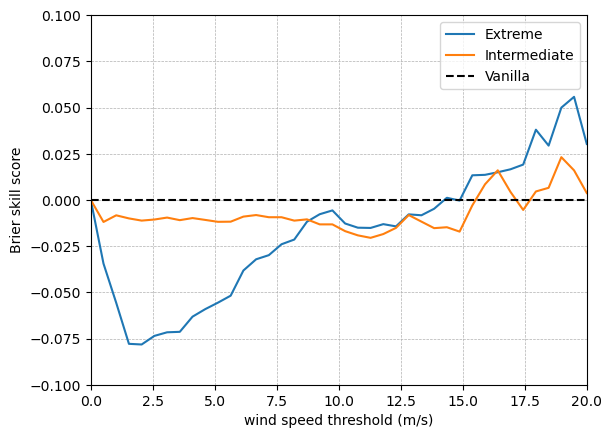

In [30]:
values = np.linspace(0,20, 40)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base, linear_weight_models, test_data0, values, ylim=ylim, name_base_model='Vanilla')

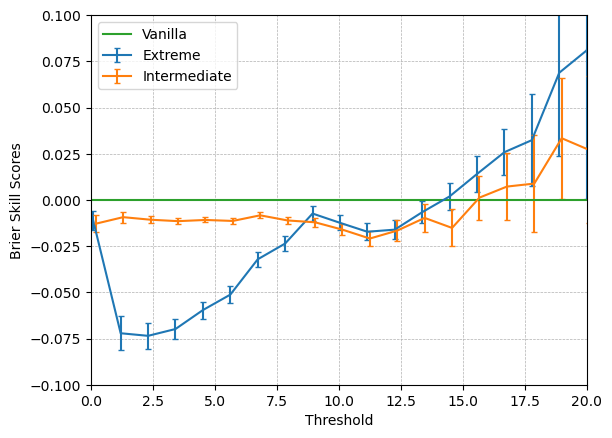

In [21]:
ylim = [-0.1,0.1]
values = np.linspace(0,20,20)
make_bootstrap_brier_efficient(emos_base, linear_weight_models, test_data0, values, ylim=ylim, bootstrap_size=1000, name_base_model='Vanilla')

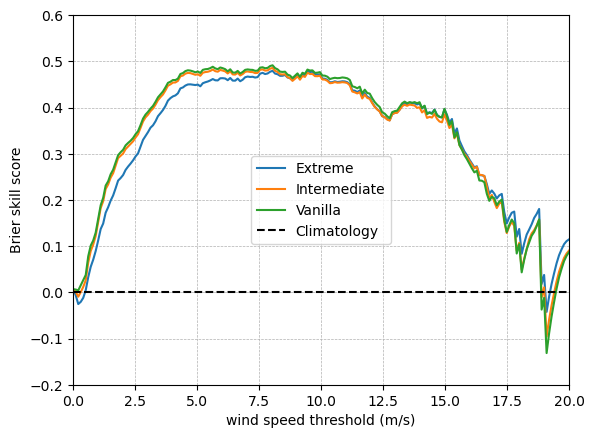

In [23]:
values = np.linspace(0.01,20, 200)
ylim = [-0.2, 0.6]
make_brier_skill_plot_tf(climatology, all_linear_models, test_data0, values, ylim=ylim, name_base_model='Climatology')

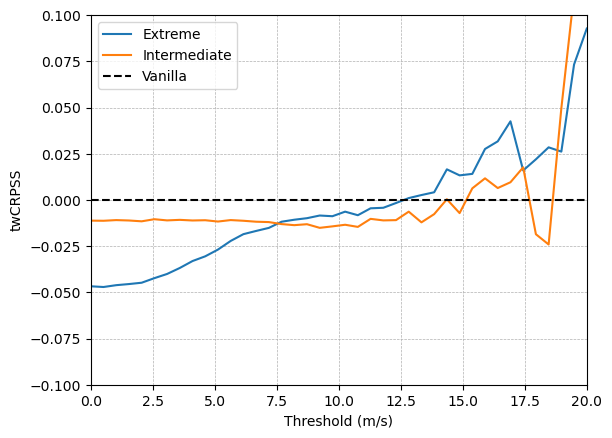

In [25]:
values = np.linspace(0,20,40)
make_twcrpss_plot_tf(emos_base, linear_weight_models, test_data0, values, ylim=[-0.1,0.1], sample_size=5000, base_model_name='Vanilla')

There are 16 values in the PIT diagram


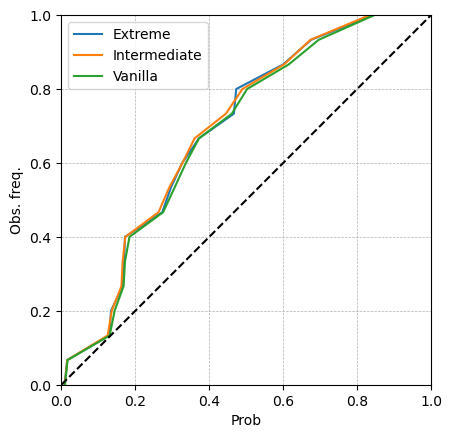

In [28]:
threshold = 17
make_cpit_diagram_tf(linear_weight_models, test_data0_original, t=threshold, base_model=emos_base, base_model_name='Vanilla')

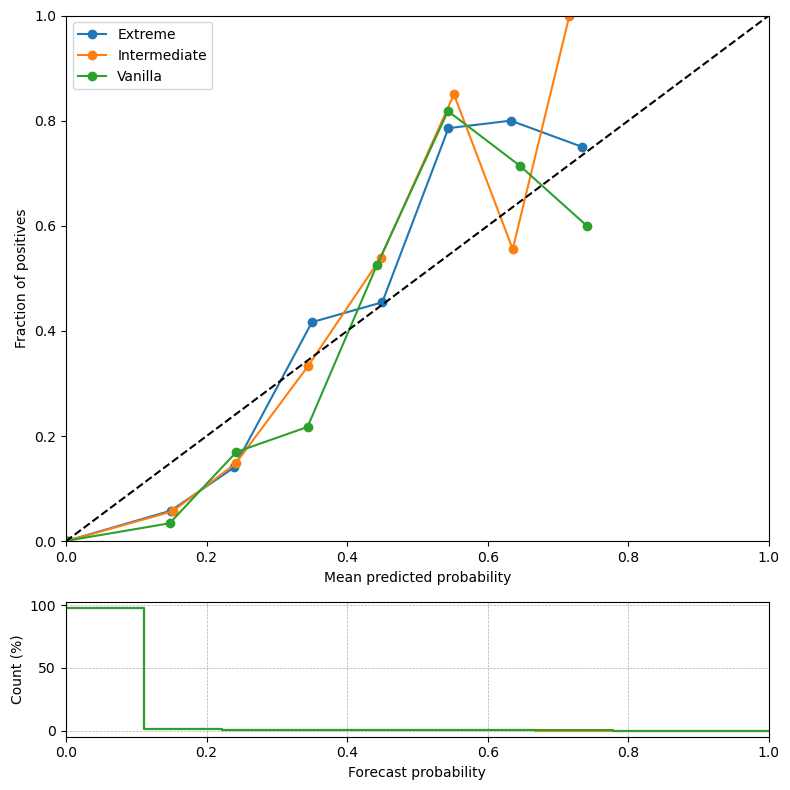

In [31]:
threshold = 15
make_reliability_and_sharpness_tf(linear_weight_models, test_data0, t=threshold, base_model=emos_base, base_model_name='Vanilla')

## Result of Cross-Validation

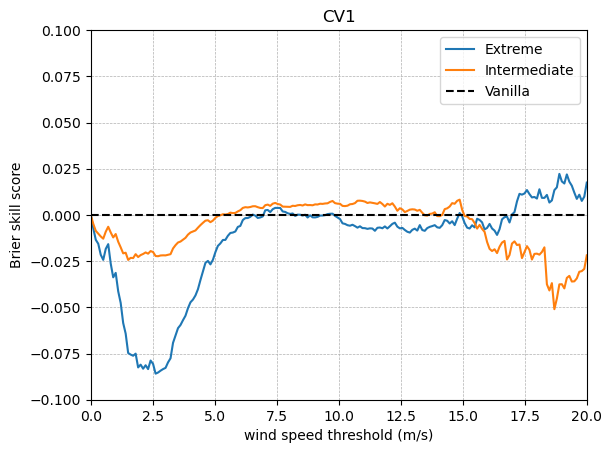

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base1, linear_weight_models1, test_data1, values, ylim=ylim, name_base_model='Vanilla', title='CV1')

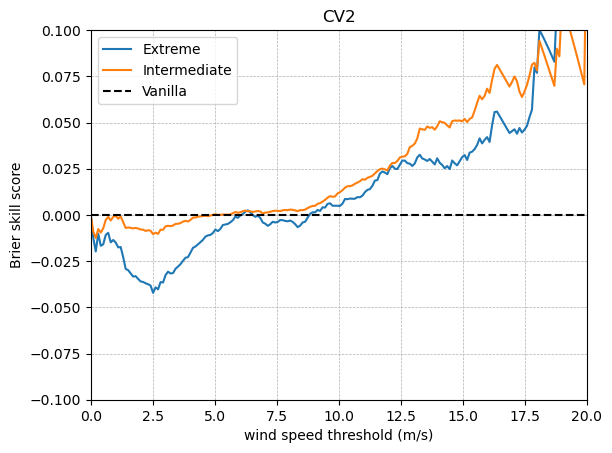

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base2, linear_weight_models2, test_data2, values, ylim=ylim, name_base_model='Vanilla', title='CV2')

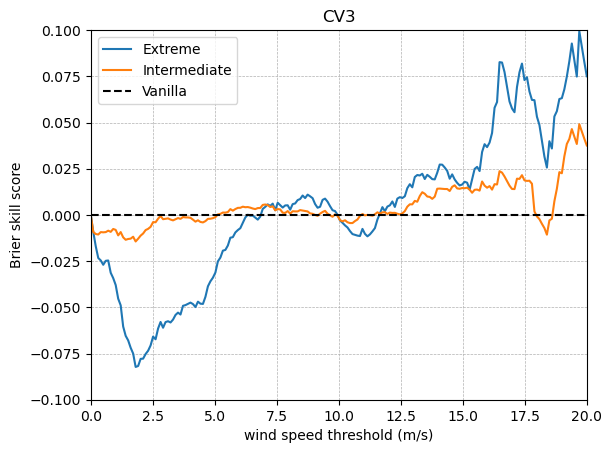

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base3, linear_weight_models3, test_data3, values, ylim=ylim, name_base_model='Vanilla', title='CV3')

### Results CNNs

In [46]:
display(top_CRPS_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
58,75.500000,2.562573,5.181592,0.921521,0.822719,0.055512
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
57,67.000000,2.934506,5.517093,0.997124,0.823697,0.055616
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
40,61.333333,-0.770368,1.445118,0.837672,0.824272,0.055433
36,44.833333,2.206306,3.579858,0.875382,0.824364,0.055667
65,71.666667,1.331423,0.029540,0.924497,0.824616,0.055436
29,70.666667,-0.818025,0.001353,0.324473,0.824717,0.055406
34,56.833333,4.893108,7.301722,0.996173,0.824825,0.055409
75,80.666667,3.823494,0.546135,0.907603,0.824969,0.055409


In [47]:
display(top_twCRPS12_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
87,79.000000,5.419507,7.822199,0.919453,0.826580,0.054876
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
80,73.333333,2.034307,4.537156,0.858824,0.826256,0.055264
45,62.833333,5.493173,5.443629,0.864578,0.825594,0.055265
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
68,79.833333,8.097774,6.086351,0.881245,0.827166,0.055325
7,35.666667,7.637882,0.132999,0.767333,0.831321,0.055331
69,93.333333,11.254960,0.000110,0.615786,0.829631,0.055335
50,58.666667,1.043101,5.433051,0.936747,0.826826,0.055338
43,41.000000,5.860291,1.278010,0.841591,0.828269,0.055374


In [48]:
display(my_run_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
58,75.500000,2.562573,5.181592,0.921521,0.822719,0.055512
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
87,79.000000,5.419507,7.822199,0.919453,0.826580,0.054876


In [34]:
print(epochs_115.mean() * 2/3)
print(epochs_extreme.mean() * 2/3)

49.8013468013468
51.45185185185185


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


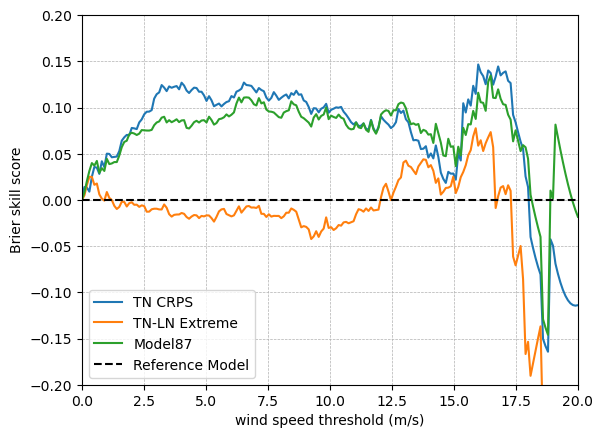

In [56]:
values = np.linspace(0, 20, 200)
ylim= [-0.2, 0.2]
make_brier_skill_plot_tf(emos_base, cnn_models, test_data0, values, ylim=ylim)